In [2]:
# Basic Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing & Scaling
from sklearn.preprocessing import StandardScaler

# Model Building
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Class Imbalance Handling
from imblearn.over_sampling import SMOTE

# Model Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score


In [3]:
# Load the dataset
data = pd.read_csv('Credit Card Fraud Detection/creditcard_2023.csv')

# Check the first few rows of the data
print(data.head())


   id        V1        V2        V3        V4        V5        V6        V7  \
0   0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898  0.519014   
1   1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605  0.406466   
2   2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481  0.743511   
3   3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312  0.518269   
4   4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549  0.658849   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.130006  0.727159  ... -0.110552  0.217606 -0.134794  0.165959  0.126280   
1 -0.133118  0.347452  ... -0.194936 -0.605761  0.079469 -0.577395  0.190090   
2 -0.095576 -0.261297  ... -0.005020  0.702906  0.945045 -1.154666 -0.605564   
3 -0.065130 -0.205698  ... -0.146927 -0.038212 -0.214048 -1.893131  1.003963   
4 -0.212660  1.049921  ... -0.106984  0.729727 -0.161666  0.312561 -0.414116   

        V26       V27       V28    Amount  C

In [4]:
# Dataset Info
print("Dataset Info:")
print(data.info())

# Statistical Summary
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values in the Dataset:")
print(data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 

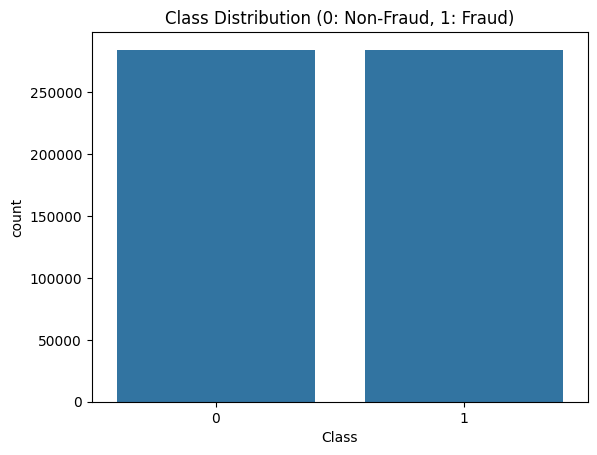


Class Distribution:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [5]:
# Class Distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

# Display percentage of each class
fraud_percentage = data['Class'].value_counts(normalize=True) * 100
print(f"\nClass Distribution:\n{fraud_percentage}")


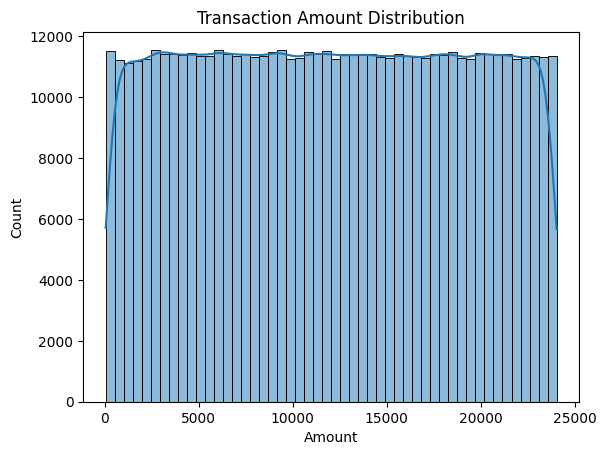

In [6]:
# Transaction Amount Distribution
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


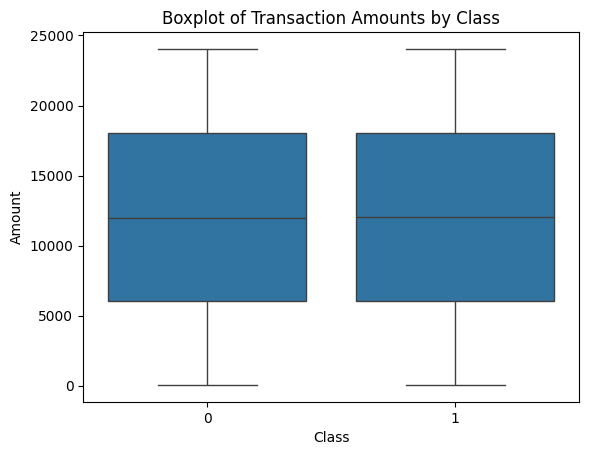

In [7]:
# Boxplot for Amount
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Boxplot of Transaction Amounts by Class')
plt.show()


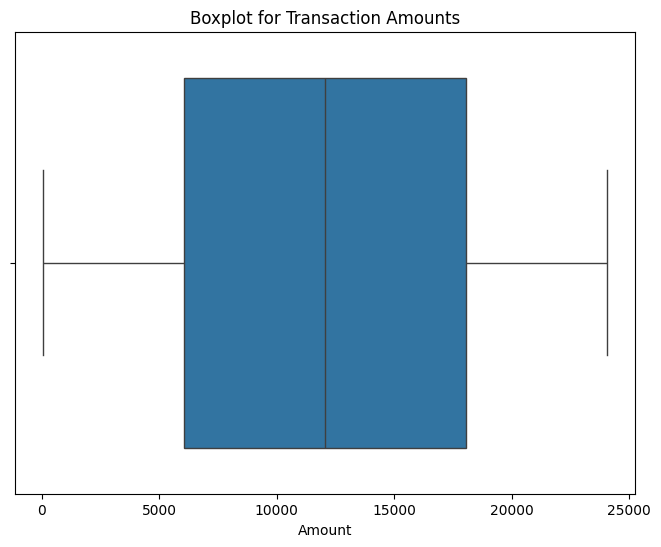

In [8]:
# Outlier Detection using box plot for the 'Amount' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amount', data=data)
plt.title('Boxplot for Transaction Amounts')
plt.show()



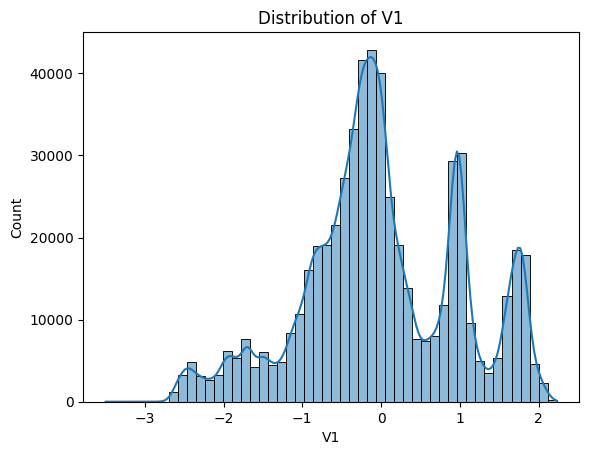

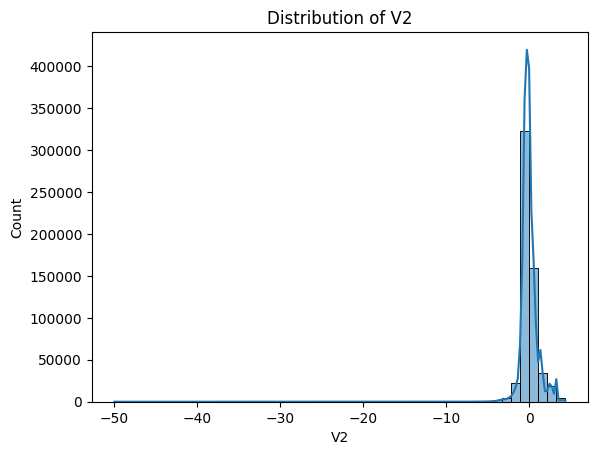

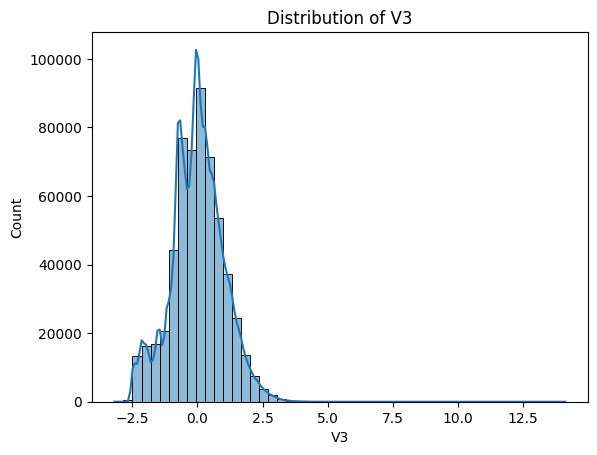

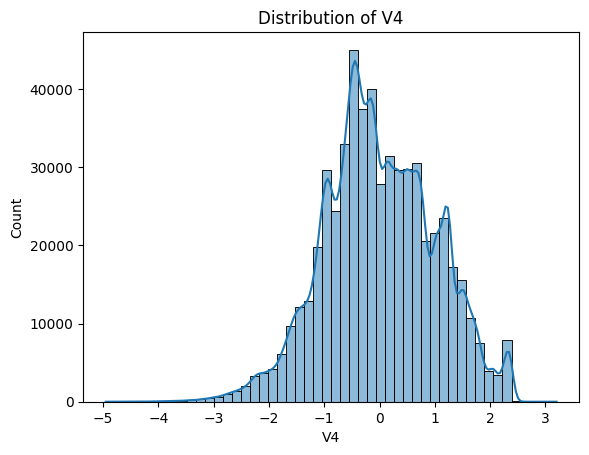

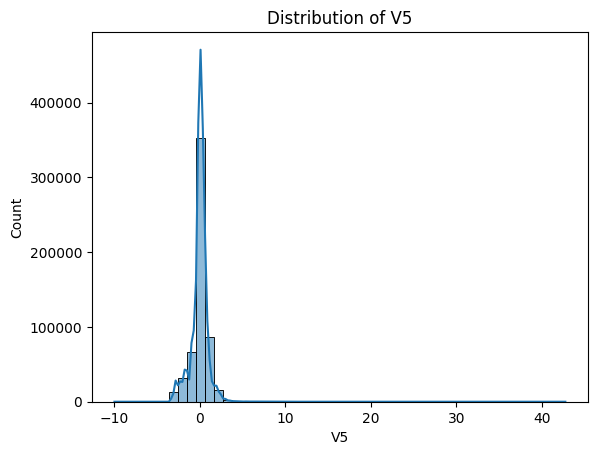

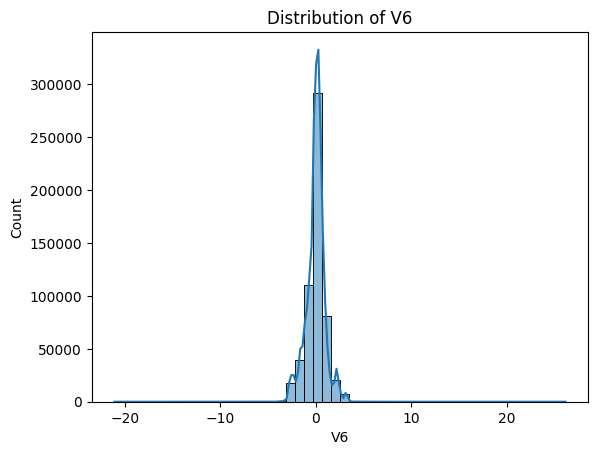

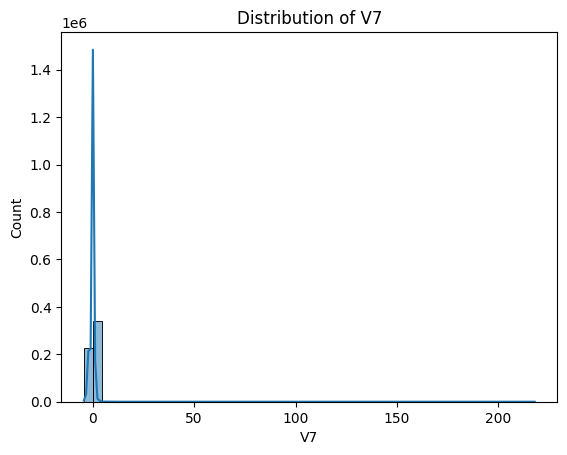

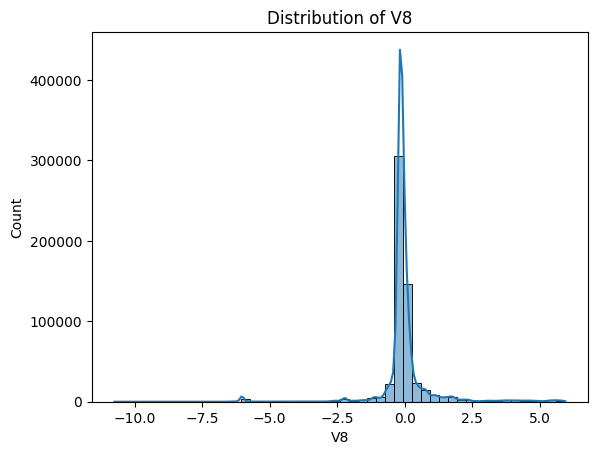

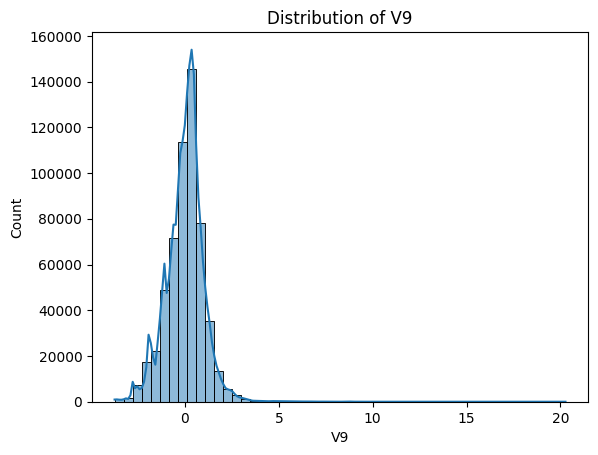

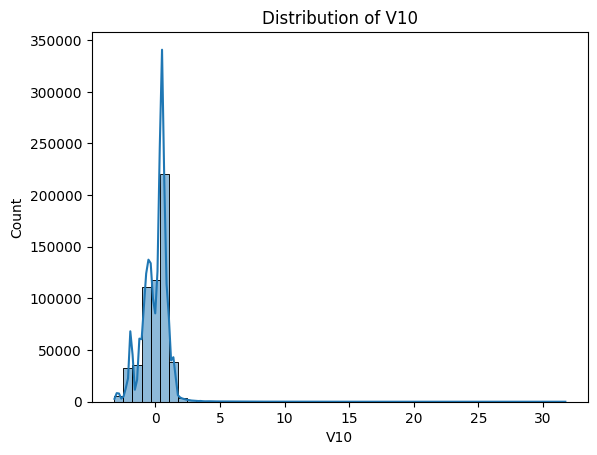

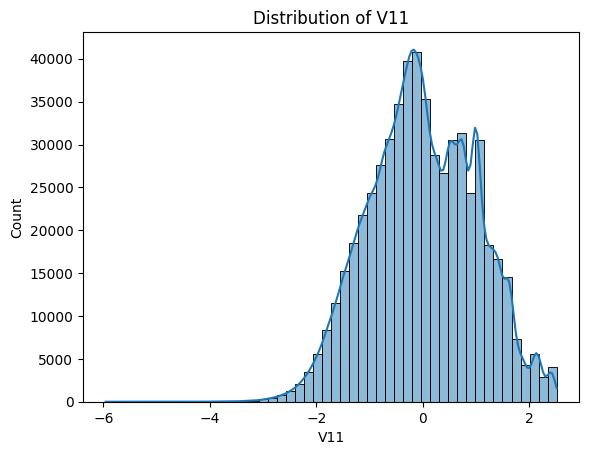

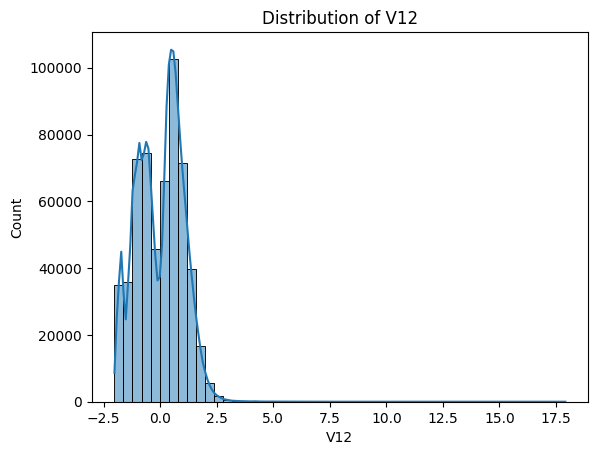

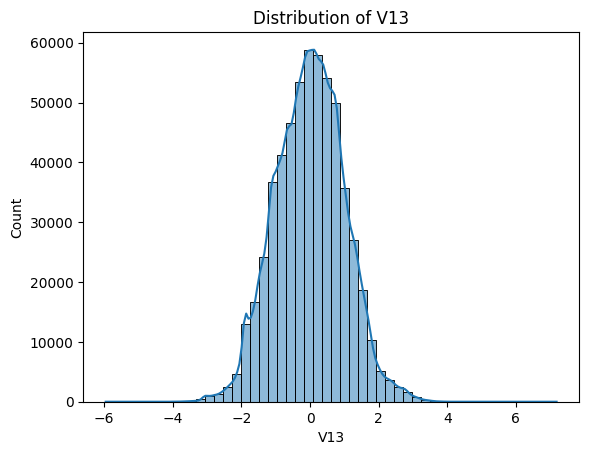

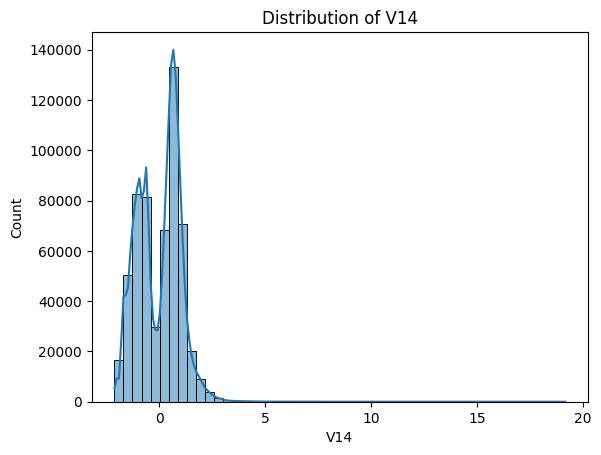

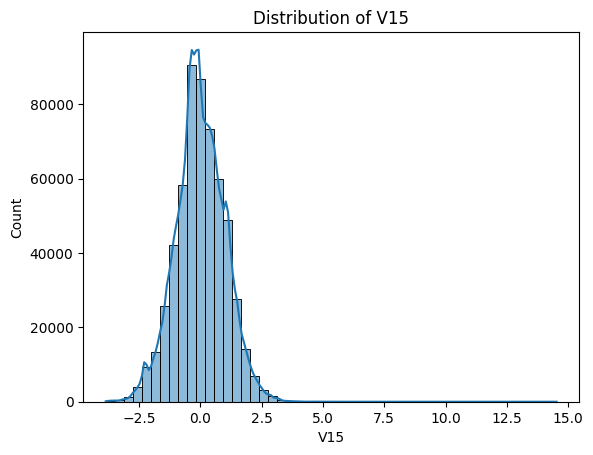

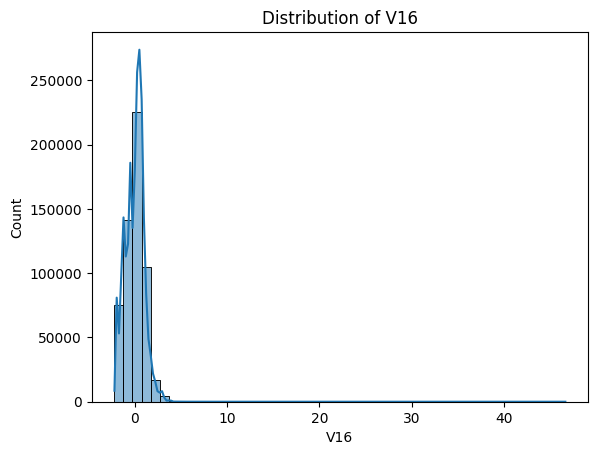

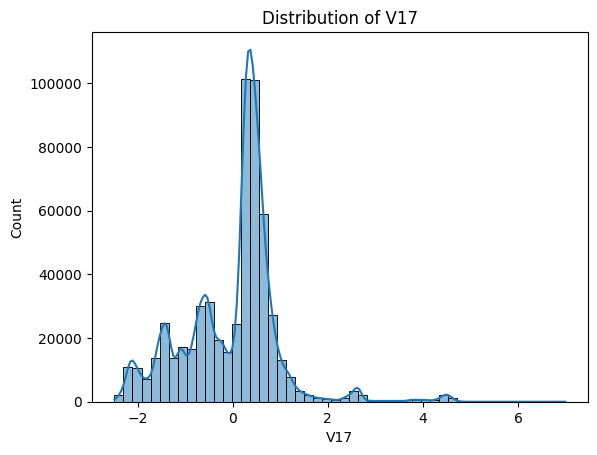

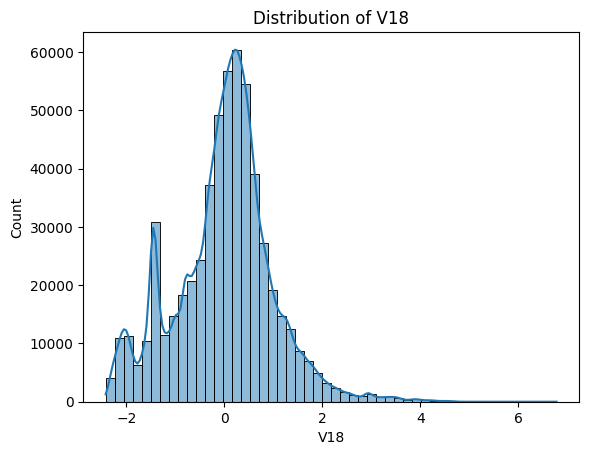

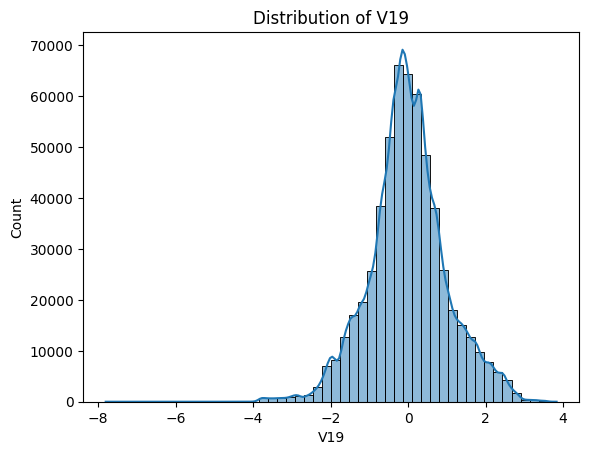

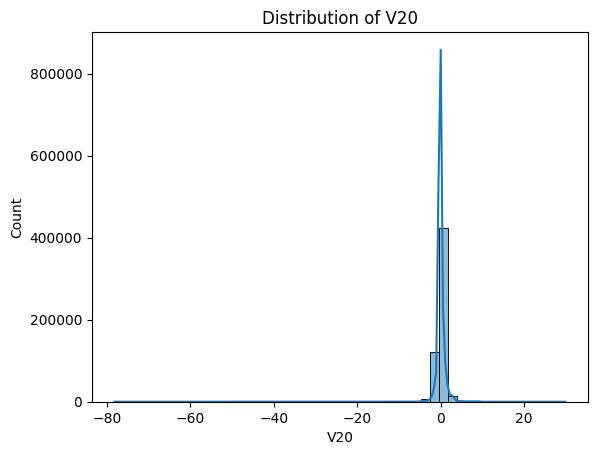

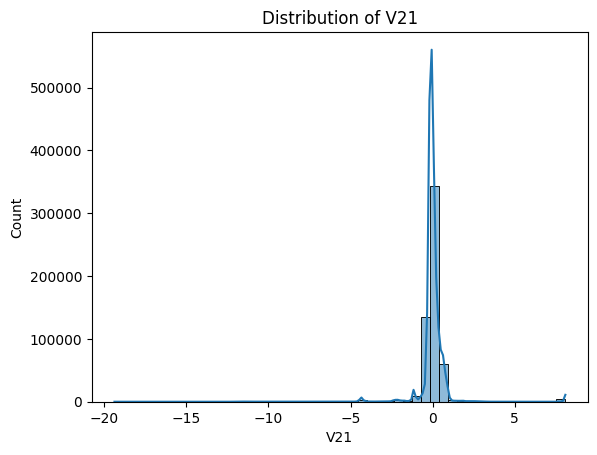

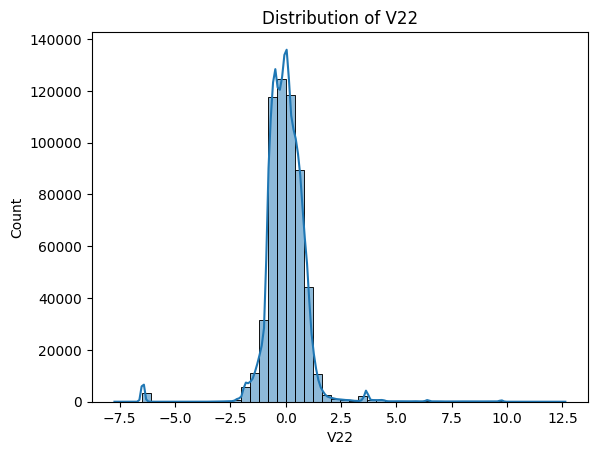

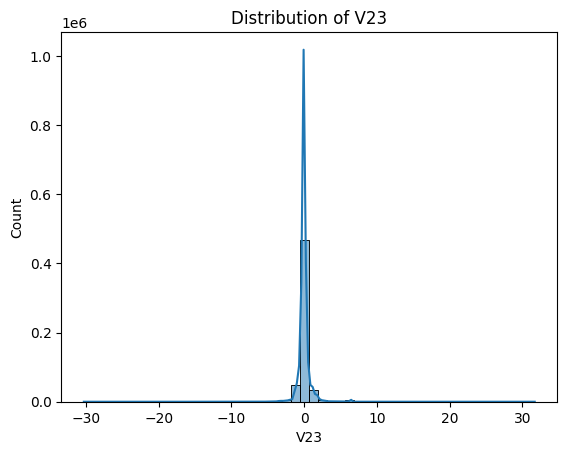

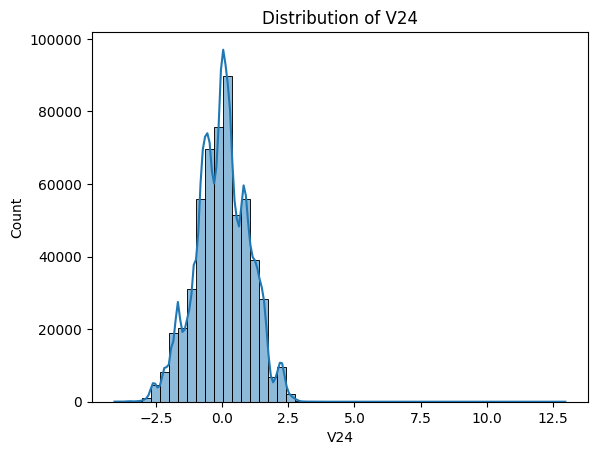

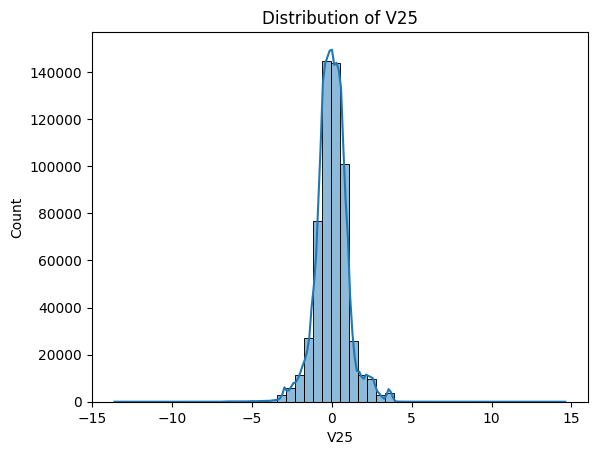

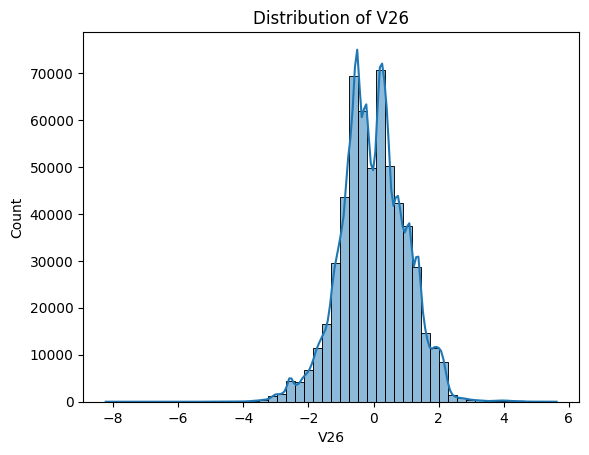

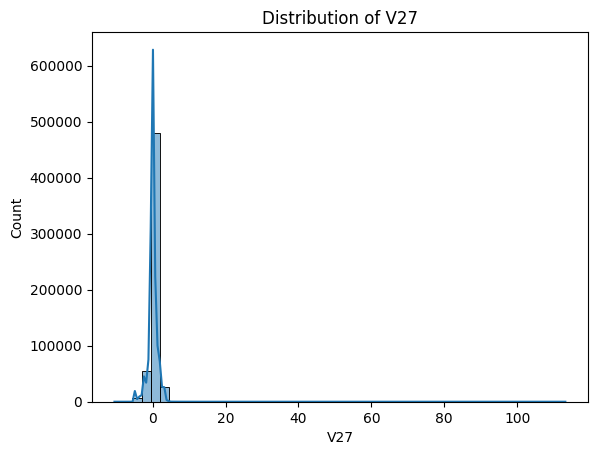

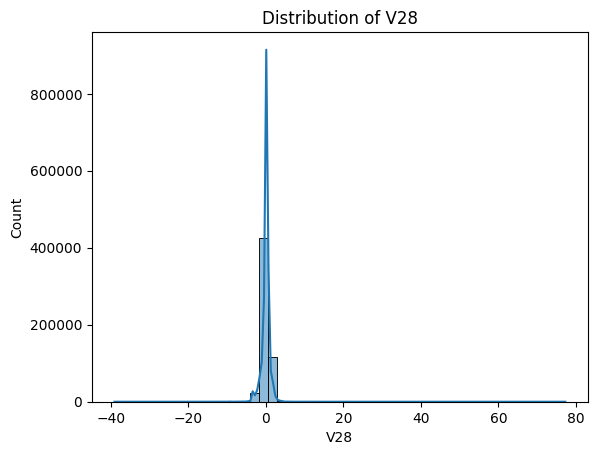

In [9]:
# Numerical Feature Distribution
for feature in data.columns:
    if 'V' in feature:
        sns.histplot(data[feature], bins=50, kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()


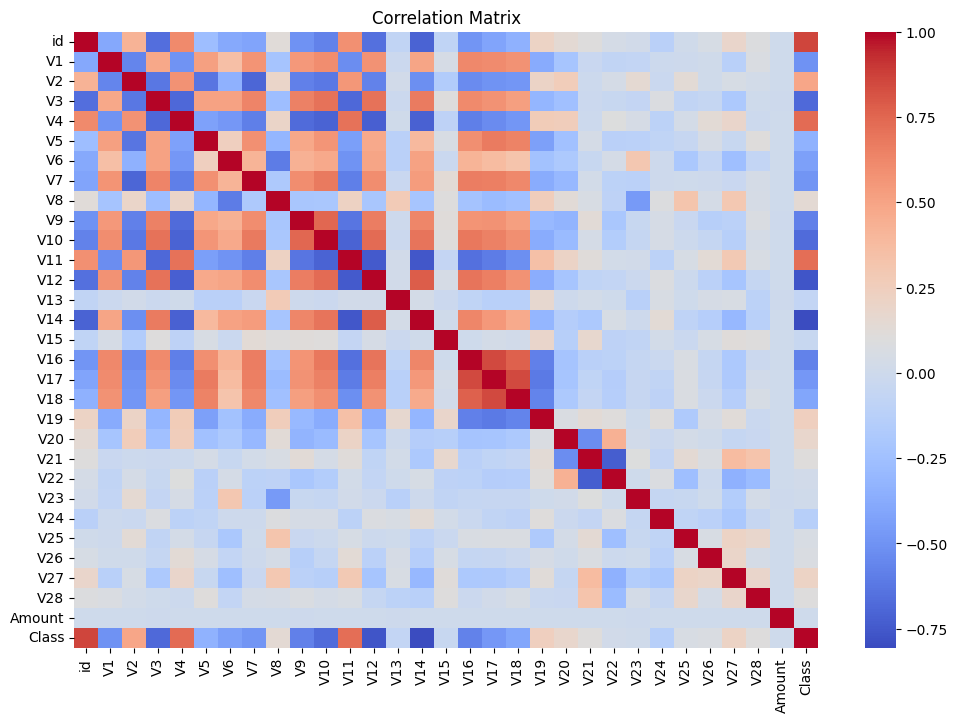

In [10]:
# Correlation Matrix
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()


In [11]:
# Normalization: Drop 'id' and 'Class', then scale the remaining features
X = data.drop(columns=['id', 'Class'])
y = data['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Verify the scaling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df.describe())



                 V1            V2             V3            V4            V5  \
count  5.686300e+05  5.686300e+05  568630.000000  5.686300e+05  5.686300e+05   
mean  -2.998967e-17 -2.599105e-17       0.000000 -2.879008e-17  7.997245e-18   
std    1.000001e+00  1.000001e+00       1.000001  1.000001e+00  1.000001e+00   
min   -3.495584e+00 -4.996657e+01      -3.183760 -4.951222e+00 -9.952786e+00   
25%   -5.652859e-01 -4.866777e-01      -0.649299 -6.560203e-01 -2.934955e-01   
50%   -9.363846e-02 -1.358939e-01       0.000353 -7.376152e-02  8.108788e-02   
75%    8.326582e-01  3.435552e-01       0.628538  7.070047e-01  4.397368e-01   
max    2.229046e+00  4.361865e+00      14.125834  3.201536e+00  4.271689e+01   

                 V6            V7            V8            V9           V10  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean  -3.998623e-19 -2.039298e-17 -6.997590e-18  2.998967e-17 -4.398485e-17   
std    1.000001e+00  1.000001e+00  1.00000

In [13]:
# Handling class imbalance using SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

# Verify class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(y_res.value_counts())



Class Distribution After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64


In [14]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [15]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [16]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


In [17]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred)}\n")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")

# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Random Forest ---
Confusion Matrix:
[[85130    19]
 [    0 85440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC-ROC: 0.9998884308682428

--- XGBoost ---
Confusion Matrix:
[[85115    34]
 [    0 85440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

AUC-ROC: 0.9998003499747502



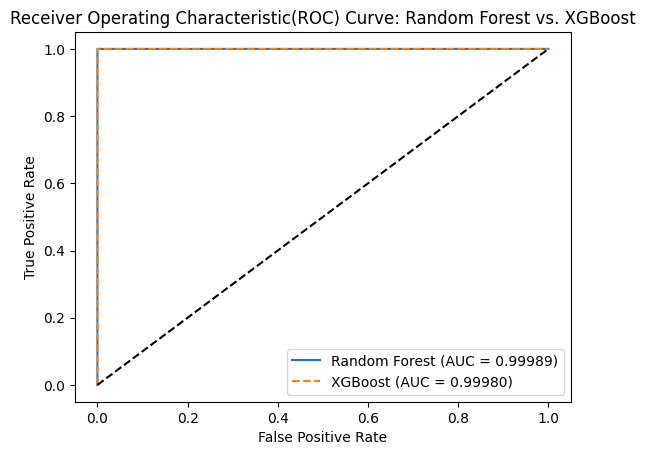

In [18]:
# ROC Curve Plotting with Dotted Lines
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.5f})'.format(roc_auc_score(y_test, y_pred_rf)), linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.5f})'.format(roc_auc_score(y_test, y_pred_xgb)), linestyle='--')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve: Random Forest vs. XGBoost')
plt.legend(loc='best')
plt.show()


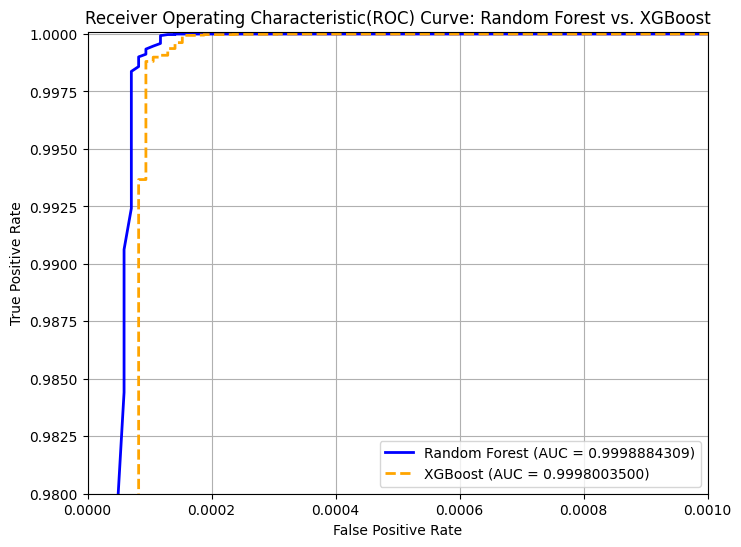

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC Curve for Random Forest and XGBoost
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Pre-defined AUC values
auc_rf = 0.9998884308682428
auc_xgb = 0.9998003499747502

plt.figure(figsize=(8, 6))

# Plot ROC curves with different styles
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.10f})'.format(auc_rf), color='blue', lw=2, linestyle='-')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.10f})'.format(auc_xgb), color='orange', lw=2, linestyle='--')

# Random guess line (diagonal)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Zoom in to the relevant part of the ROC curve
plt.xlim([0.0, 0.001])
plt.ylim([0.98, 1.0001])

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC) Curve: Random Forest vs. XGBoost')
plt.legend(loc='lower right')

# Show the grid and plot
plt.grid(True)
plt.show()


In [20]:
# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

# If you have LightGBM and CatBoost models, calculate their metrics here

# Create a dictionary with evaluation results
evaluation_data = {
    'Model': ['Random Forest', 'XGBoost'],  # Add more models as needed
    'Accuracy': [accuracy_rf, accuracy_xgb],  # Add accuracy for each model
    'Precision': [precision_rf, precision_xgb]  # Add precision for each model
}

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)

           Model  Accuracy  Precision
0  Random Forest  0.999889   0.999778
1        XGBoost  0.999801   0.999602
